In [7]:
from hyperparameters import STD_MODEL_FOLDER
import json
import os

> run `wandb login` in terminal before running this notebook

### Delete model

In [8]:
# Delete folder from model_development/models
# Delete entry from trained_models.json

def delete_model(model_name):
  model_path = f"{STD_MODEL_FOLDER}/{model_name}"
  assert os.path.exists(model_path), f"Model {model_name} does not exist."
  os.system(f"rm -rf {model_path}")
  with open("./assets/trained_models.json", "r+") as file:
    trained_models = json.load(file)
    if model_name in trained_models:
      del trained_models[model_name]
      file.seek(0)
      json.dump(trained_models, file, indent=4)
      file.truncate()

delete_model("test_yolo_mAP_test3")

AssertionError: Model test_yolo_mAP_test3 does not exist.

## Visualise Dataset

In [1]:
from data.dataset import CustomDataset

In [2]:
training_data = {
            "dataset_name": "mvd2",
            "datasets": {
                "rf1": 1,
                "rf2": 1,
                "rf3": 0.15,
                "mwitt": 1,
                "openimagesv7": 1,
                "sl": 1,
                "backgrounds": 1
            },
            "augmentations": [
                "Equalise",
                "Rotate",
                "Crop",
                "Bbox-rotate",
                "Cutout"

            ]
        }
data_dir = "/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/images_raw/"
dataset = CustomDataset(training_data["dataset_name"], data_dir, training_data["datasets"], training_data["augmentations"], img_size=640)

rf1_LT005_GP010007_0408_mp4-62_jpg.rf.494c005da5fd4d8984f2075a20d03ebc.jpg


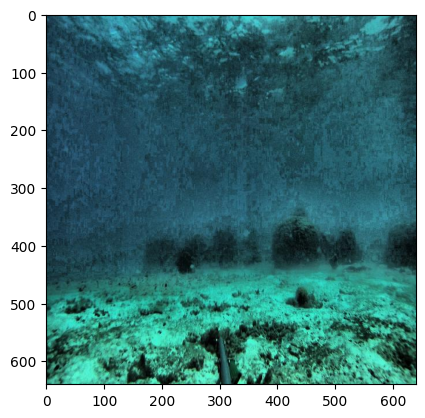

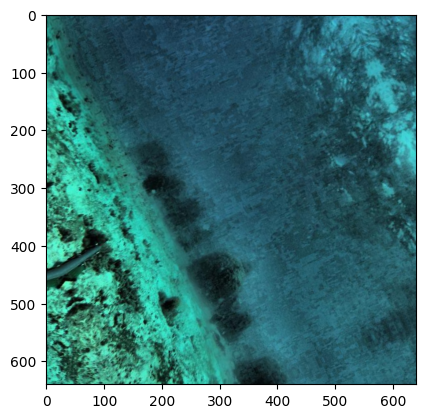

In [3]:
import matplotlib.pyplot as plt
from data.image_processor import ImageProcessor
import cv2
dataset.plot_single_image(10)
anno = dataset[10]
image = anno["image"]
bboxes = anno["bboxes"]
img = ImageProcessor.draw_rect(image, bboxes, show=True)

In [5]:
dataset.get_info(".")